In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [107]:
# Load the data from dat repository inside src/data folder
data=pd.read_csv('data/spam.csv', encoding='latin-1')

In [108]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [109]:
df=data.copy()

On remarque qu'il ya 3 colonnes où on a plusieurs NAN,et sans aucune description(nom) on doit voir à quoi ils servent, sinon on les supprimes.

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [111]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


d'après les deux codes en doussus, on voit qu'il ya beacoup de valeurs nulls pour les 3 colonnes, 50/5572 pour unamed2, 12/5572 pour unamed3 et 6/5572 pour la dernieère

In [112]:
#voici le chemin qu'on va suivre dasn ce projet
# 1. Data cleaning car on a beacoup de colonnes inutiles
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [113]:
# Comme les 3 deeux colonnes ne sont pas utiles, on va les supprimer
df=df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [114]:
df.head()   

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [115]:
#pour plus de visibilité on renomme les colonnes
df=df.rename(columns={'v1':'label', 'v2':'text'})

In [116]:
#on va voir les différents types de labels
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [117]:
#on a deux types de labels, on va les transformer en 0 et 1 (on peut soit le faire avec un map ou avec un label encoder)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])


In [118]:
df['label'].value_counts()

label
0    4825
1     747
Name: count, dtype: int64

In [119]:
#count of missing values
df.isnull().sum()

label    0
text     0
dtype: int64

In [120]:
#les valeurs dupliquées
df.duplicated().sum()

np.int64(403)

In [121]:
#étudions la distribution des valeurs dupliquées
df[df.duplicated()]['label'].value_counts()

label
0    309
1     94
Name: count, dtype: int64

In [122]:
#supprimons les valeurs dupliquées
df=df.drop_duplicates()

In [123]:
df.shape

(5169, 2)

# 2. Exploratory Data Analysis

In [124]:
# value counts of the labels
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2747bc53980>,
 [Text(-0.42519425283422474, -1.014499801555794, 'ham'),
  Text(0.42519392226820807, 1.0144999401016135, 'spam')],
 [Text(-0.2319241379095771, -0.5533635281213422, '87.4%'),
  Text(0.23192395760084072, 0.553363603691789, '12.6%')])

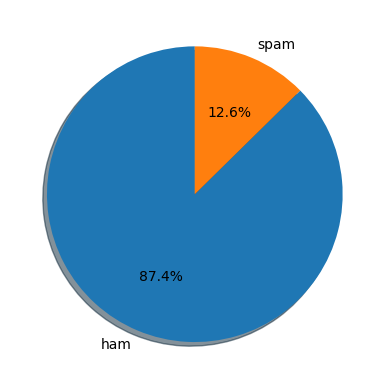

In [125]:
#let's see the distribution of the labels in a pie chart
fig, ax = plt.subplots()
ax.pie(df['label'].value_counts(), labels=['ham','spam'], autopct='%1.1f%%', startangle=90,shadow=True)

On peut voir que les données sont déséquilibrés(on peut tenter la data augmentation après, on va voir à qioi nous mène le projet)

In [126]:
#essayond de faire le processing sur le texte avec spacy
import spacy
# Charger le modèle de langue anglais
nlp = spacy.load('en_core_web_sm')


In [127]:
# faut ajouter d'autres features(colonnes/caractétistiques) pour plus de visibilité ce qui va nous aider à mieux comprendre les données et à construire un meilleur modèle

In [128]:
#on va ajouter la longueur du texte
df['length']=df['text'].apply(len)

In [129]:
df.head()

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [130]:
#on va ajouter le nombre de mots avec spacy

def count_words(text):
    doc=nlp(text)
    return len(doc)

df['word_count']=df['text'].apply(count_words)

In [131]:
df.head()

,label,text,length,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [132]:
#on va ajouter le nombre de phrases(sentence count)
def count_sentences(text):
    doc=nlp(text)
    return len(list(doc.sents))

df['sentence_count']=df['text'].apply(count_sentences)

In [133]:
df.head()

,label,text,length,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [134]:
df[["length", "word_count", "sentence_count"]].describe()

,length,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.339911,2.100987
std,58.236293,13.175170,1.456628
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,2.000000
75%,117.000000,26.000000,3.000000
max,910.000000,196.000000,27.000000


In [135]:
#describe pour les ham
df[df['label']==0][["length", "word_count", "sentence_count"]].describe()

,length,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.919176,1.961913
std,56.358207,13.224373,1.400953
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,2.000000
75%,90.000000,22.000000,2.000000
max,910.000000,196.000000,27.000000


In [136]:
#describe pour les spam
df[df['label']==1][["length", "word_count", "sentence_count"]].describe()

,length,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,28.165391,3.062787
std,30.137753,7.361204,1.471835
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,33.000000,4.000000
max,224.000000,49.000000,9.000000


In [137]:
# calcul des mots avec que des lettres majuscules 
def count_uppercase_words(text):
    doc=nlp(text)
    return sum(1 for token in doc if token.is_upper)

df['uppercase_words']=df['text'].apply(count_uppercase_words)

In [138]:
df.head()

,label,text,length,word_count,sentence_count,uppercase_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,0
1,0,Ok lar... Joking wif u oni...,29,8,2,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2,2
3,0,U dun say so early hor... U c already then say...,49,13,2,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,1


In [139]:
# calculer  le nombre de mots avec des caractères spéciaux

def count_special_chars(text):
    return sum(1 for char in text if char in "!@#$%^&*()")

df['special_chars']=df['text'].apply(count_special_chars)

In [140]:
df.head()

,label,text,length,word_count,sentence_count,uppercase_words,special_chars
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,0,0
1,0,Ok lar... Joking wif u oni...,29,8,2,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2,2,3
3,0,U dun say so early hor... U c already then say...,49,13,2,2,0
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,1,0


In [141]:
#voir les nombre de spam avec les caractères spéciaux différent de 0
df[df['special_chars']!=0]['label'].value_counts()

label
0    1126
1     424
Name: count, dtype: int64

In [142]:
#voir les nombre de spam avec les caractères spéciaux egal de 0
df[df['special_chars']==0]['label'].value_counts()

label
0    3390
1     229
Name: count, dtype: int64

On a beacoup des messages de spam qui contiennent des caractères spéciaux ques ceux qui n'ont pas

In [143]:
#pour les messgaes de spam, je veux avoir des mots qui se répètent souvent avec spacy
def preprocess_text(text):
    doc = nlp(text.lower())  # Convertir le texte en minuscule
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.like_num]
    return tokens

spam_messages = df[df['label'] == 1]['text']
all_words = []
for message in spam_messages:
    all_words.extend(preprocess_text(message))
from collections import Counter
word_freq = Counter(all_words)
word_freq.most_common(10)


[('free', 194),
 ('txt', 128),
 ('text', 125),
 ('ur', 119),
 ('mobile', 118),
 ('u', 113),
 ('win', 107),
 ('stop', 104),
 ('reply', 100),
 ('claim', 98)]

<Axes: xlabel='length', ylabel='Count'>

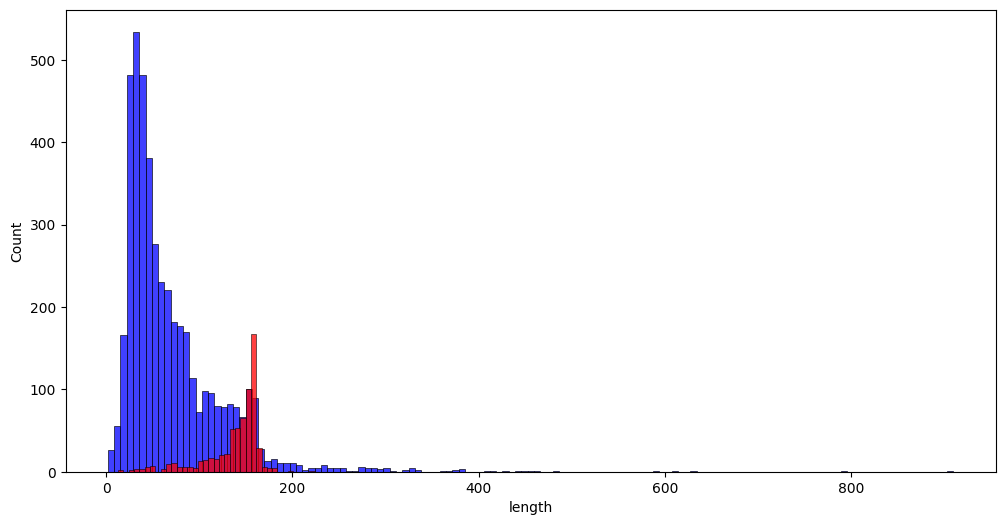

In [144]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['length'],color='blue')
sns.histplot(df[df['label'] == 1]['length'],color='red')

<Axes: xlabel='word_count', ylabel='Count'>

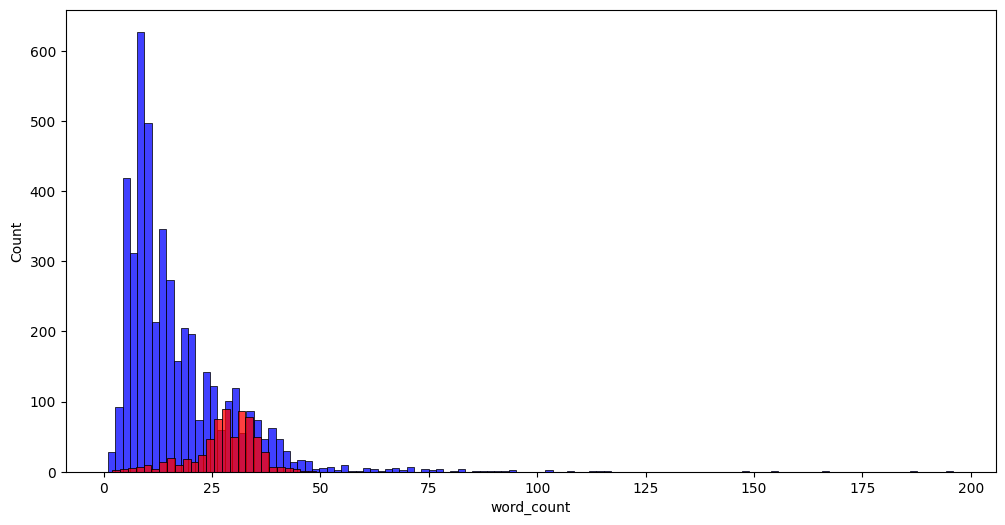

In [145]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['word_count'],color='blue')
sns.histplot(df[df['label'] == 1]['word_count'],color='red')

<Axes: xlabel='sentence_count', ylabel='Count'>

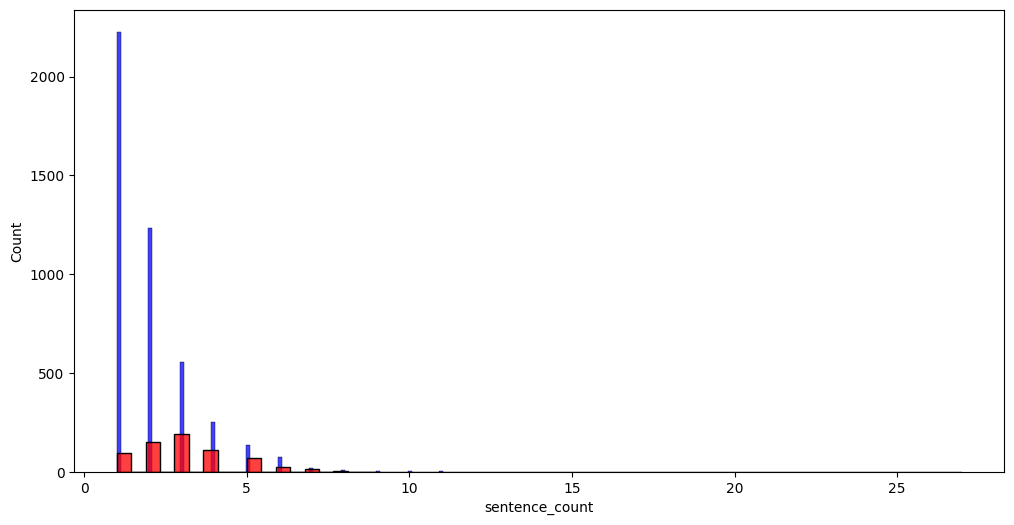

In [146]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['sentence_count'],color='blue')
sns.histplot(df[df['label'] == 1]['sentence_count'],color='red')

<Axes: xlabel='uppercase_words', ylabel='Count'>

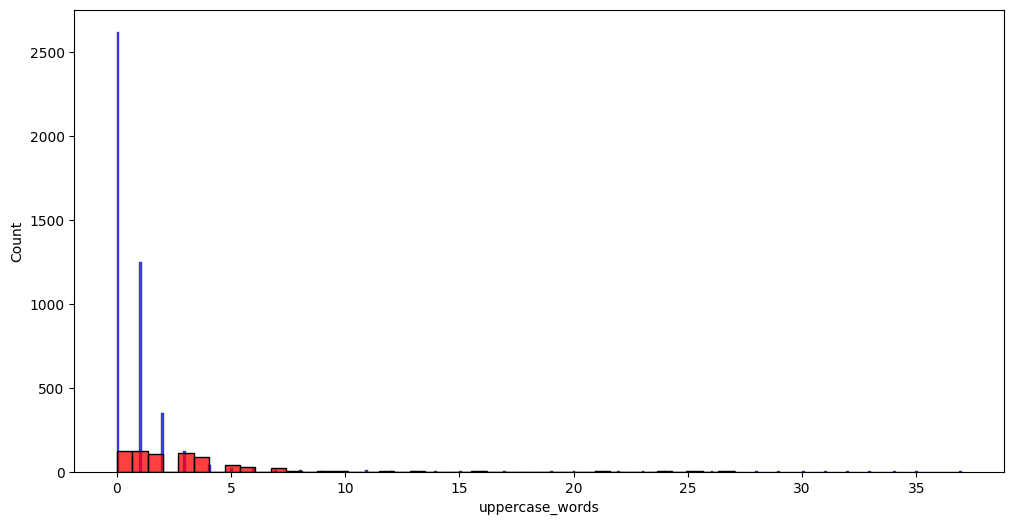

In [147]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['uppercase_words'],color='blue')
sns.histplot(df[df['label'] == 1]['uppercase_words'],color='red')

<Axes: xlabel='special_chars', ylabel='Count'>

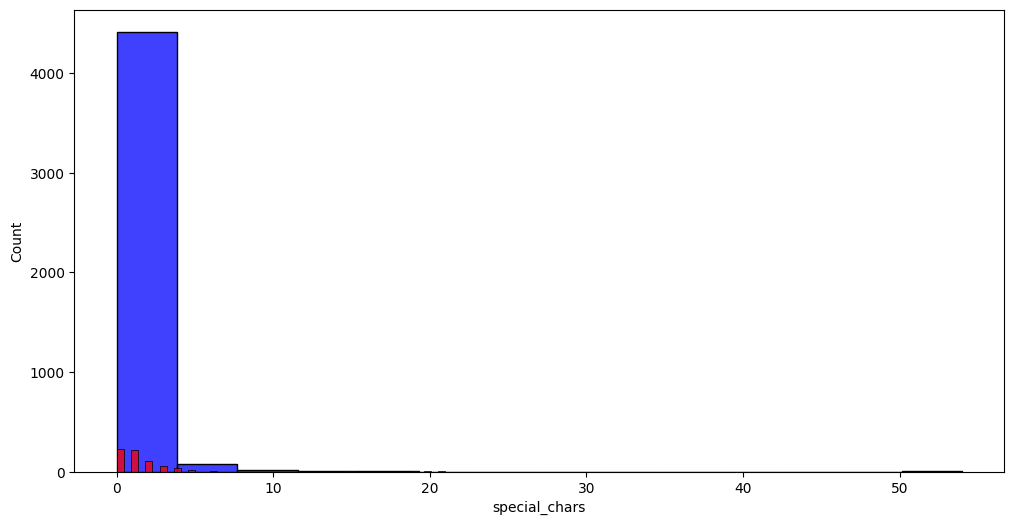

In [148]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['special_chars'],color='blue')
sns.histplot(df[df['label'] == 1]['special_chars'],color='red')

les 3 derniers histogrammes ne semblent pas très représentatifs
peut etre qu'on va garder après feature engineering que les deux premiers colonnes

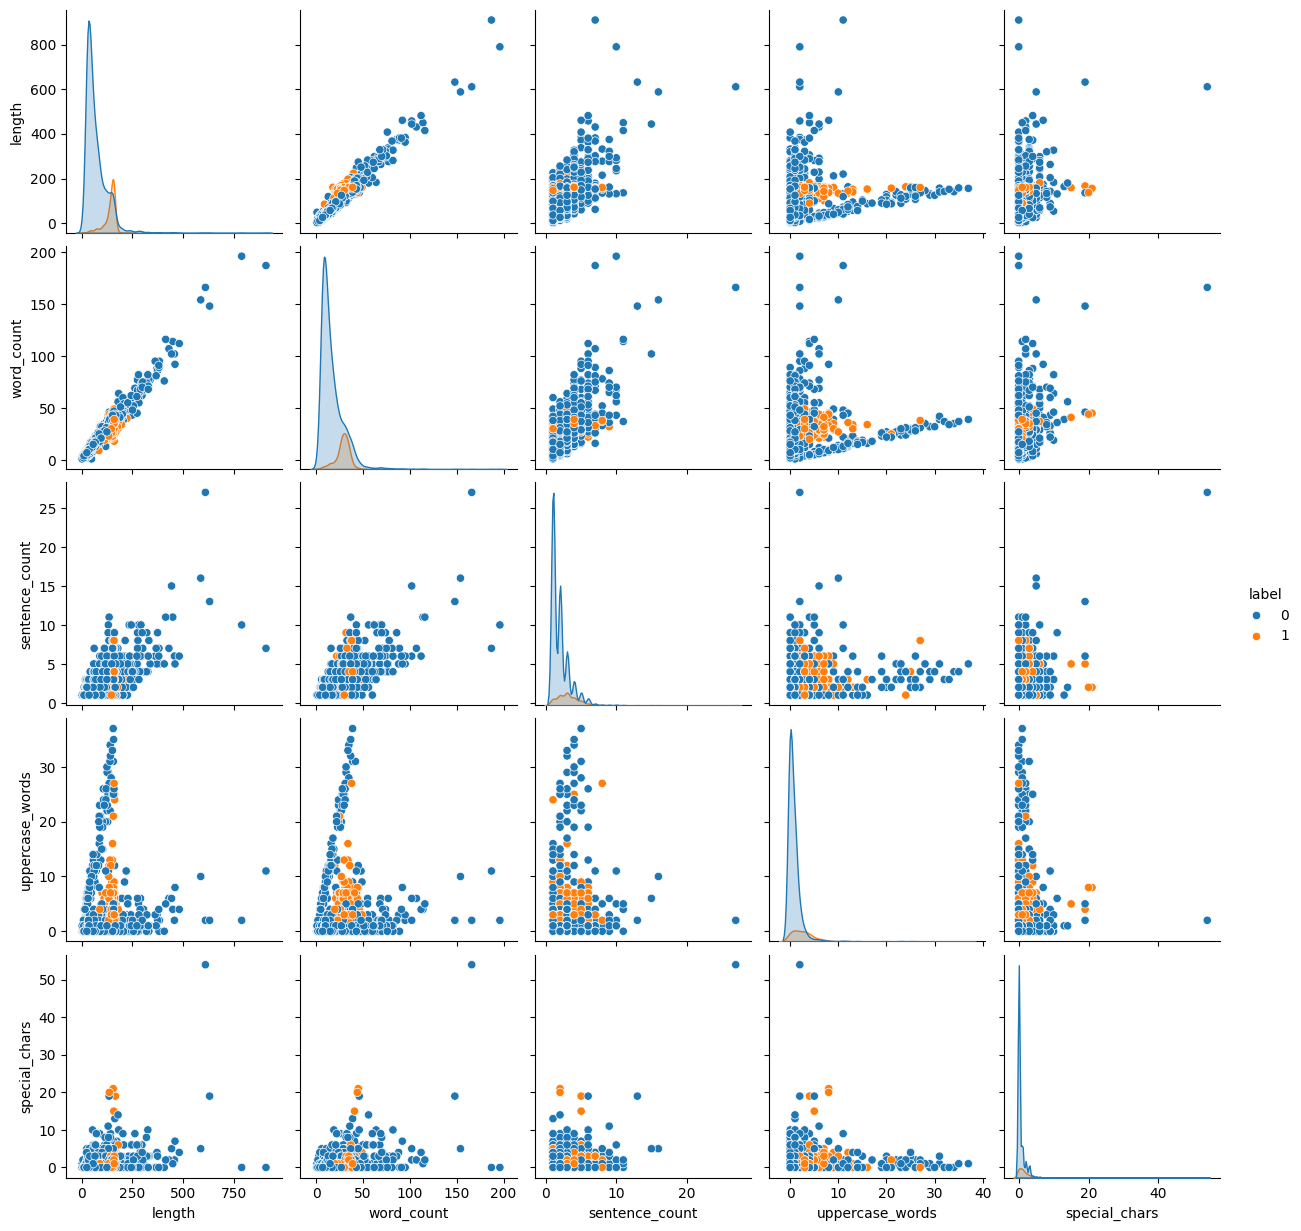

In [149]:
sns.pairplot(df,hue='label')

<Axes: >

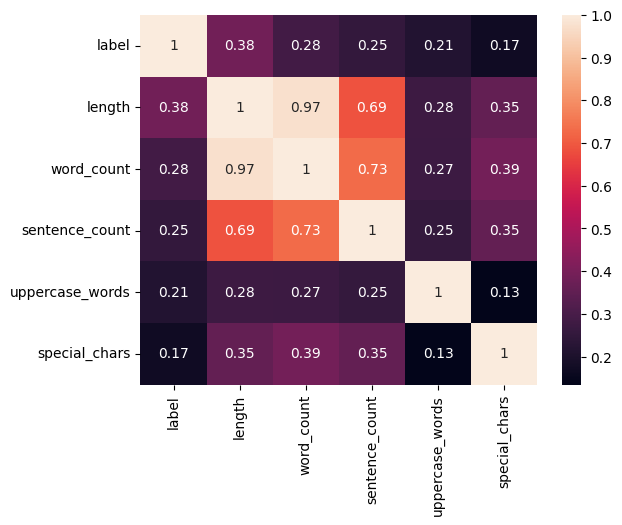

In [150]:
#faire une heatmap, faut pas inclure la colonne text
sns.heatmap(df.drop('text',axis=1).corr(),annot=True)

Une idée qui vient d'arriver, peut etre on veut calculer le pourcentages des stops word(qu'on vient de les avoir) et ajouter une colonne pour ça. bon essaye

In [151]:
#stop word
stop_words=[ word[0] for word in word_freq.most_common(10)]
stop_words

['free', 'txt', 'text', 'ur', 'mobile', 'u', 'win', 'stop', 'reply', 'claim']

In [152]:
# calculer le nombre de stop words dans le texte
stop_words=[ word[0] for word in word_freq.most_common(10)]
stop_words
def count_stop_words(text,stop_words):
    doc=nlp(text)
    return sum(1 for token in doc if token.text in stop_words)

df['num_stop_words'] = df['text'].apply(lambda text: count_stop_words(text, stop_words))


In [153]:
df.head()

,label,text,length,word_count,sentence_count,uppercase_words,special_chars,num_stop_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,0,0,0
1,0,Ok lar... Joking wif u oni...,29,8,2,0,0,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2,2,3,2
3,0,U dun say so early hor... U c already then say...,49,13,2,2,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,1,0,0


<Axes: xlabel='num_stop_words', ylabel='Count'>

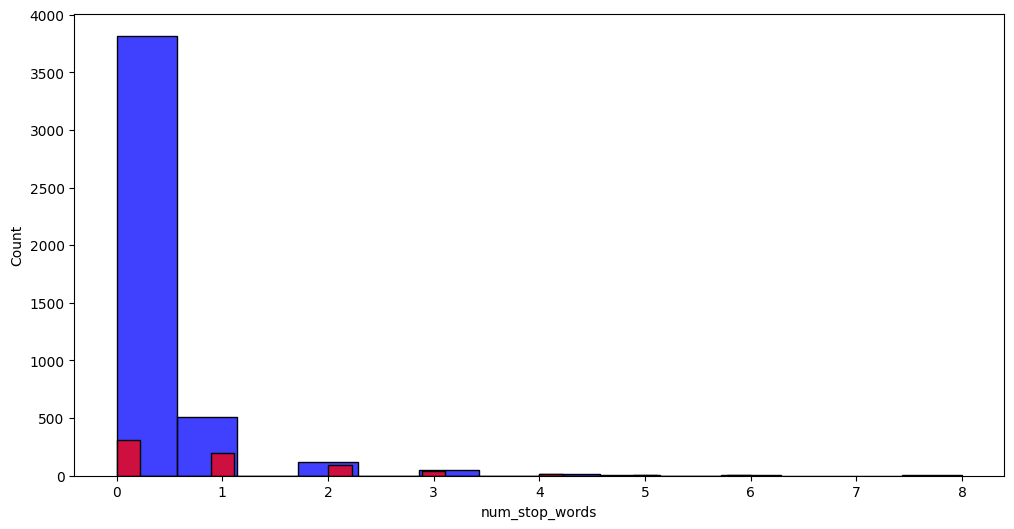

In [154]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_stop_words'],color='blue')
sns.histplot(df[df['label'] == 1]['num_stop_words'],color='red')

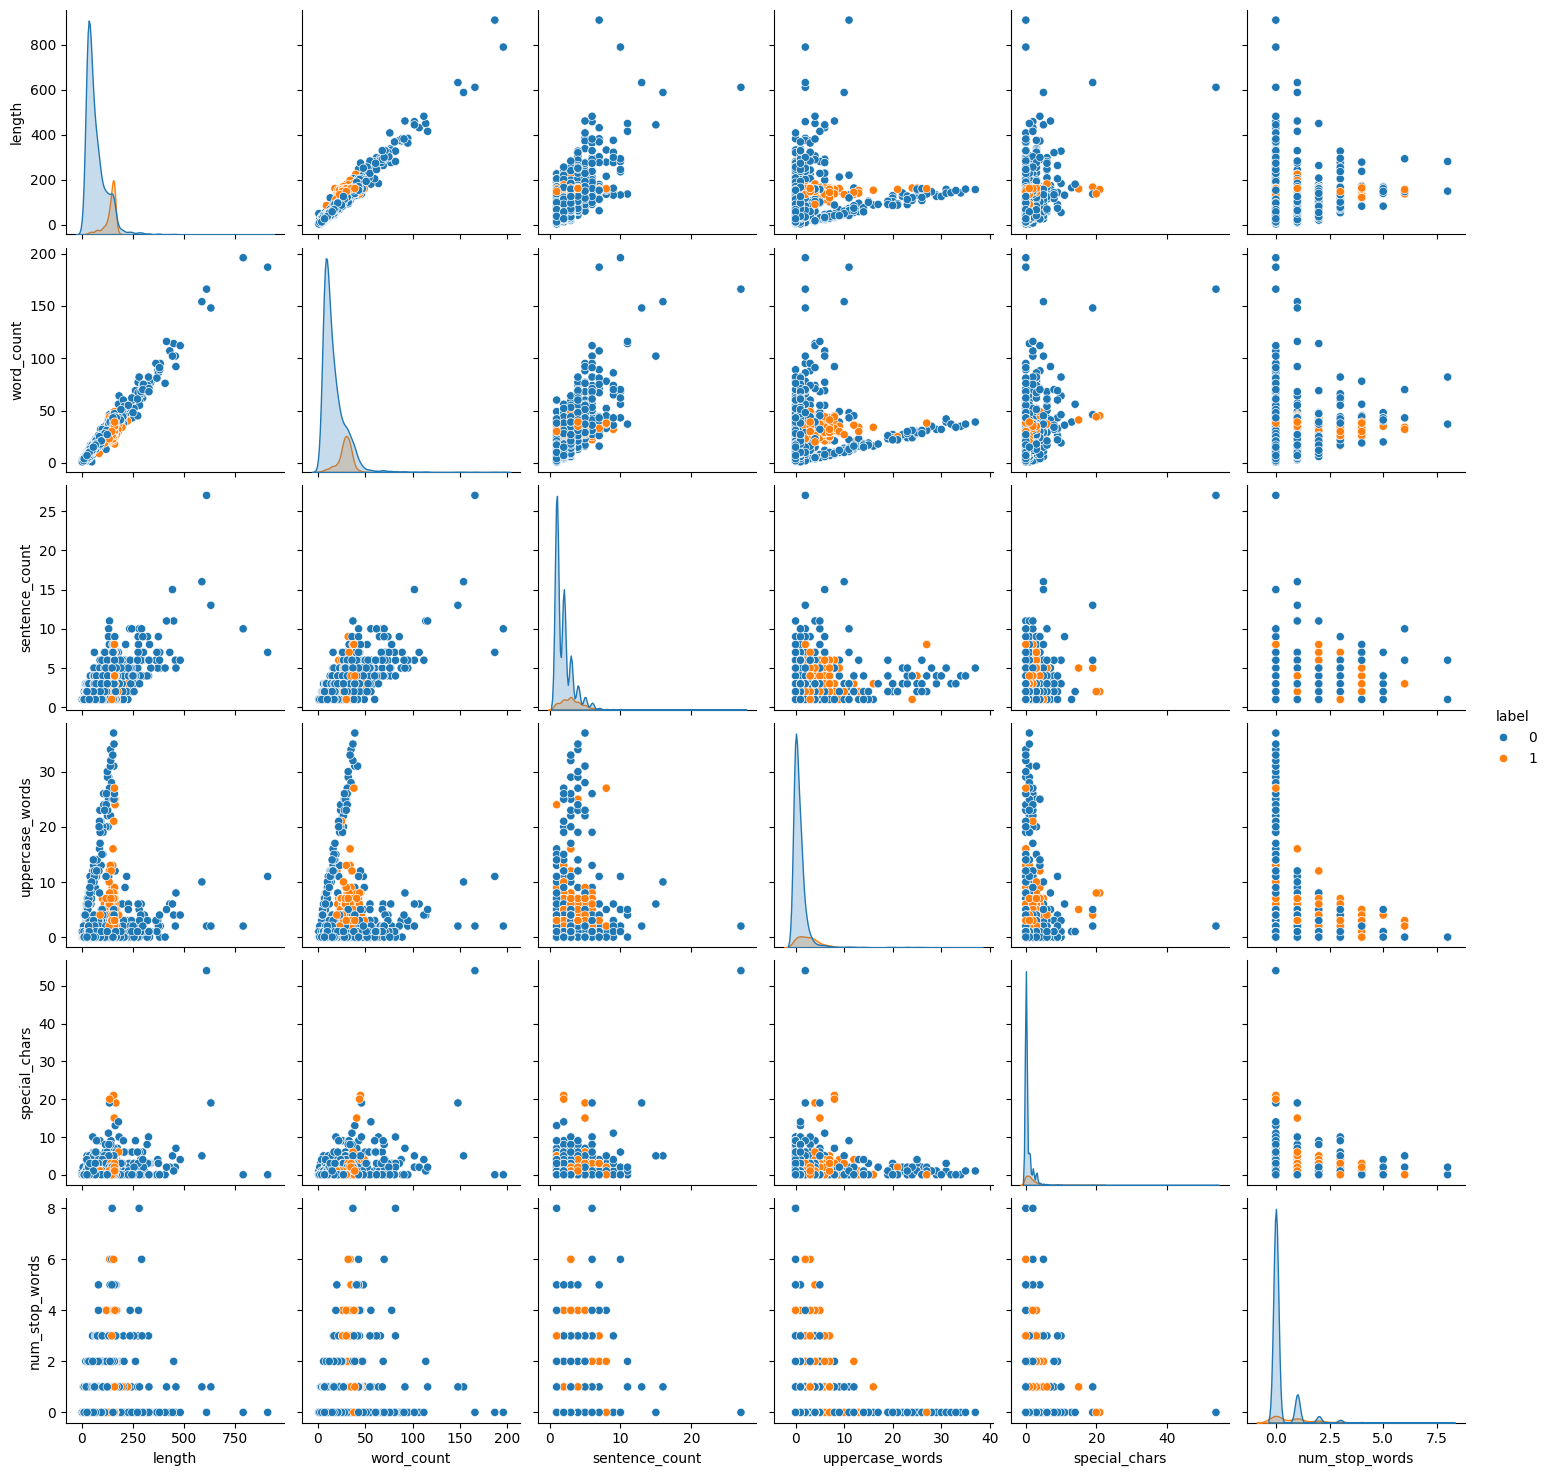

In [155]:
sns.pairplot(df,hue='label')

In [156]:
#puisque je vois pas d'intérer pour les uppercase et des caractères spéciaux, je vais transformmer le texte en miniuscule et je supprime les caractères spéciaux et je vais les droper après
def preprocess_text(text):
    doc = nlp(text.lower())  # Convertir le texte en minuscule
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

df['processed_text'] = df['text'].apply(preprocess_text)


In [157]:
df.head()

,label,text,length,word_count,sentence_count,uppercase_words,special_chars,num_stop_words,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,0,0,0,jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,29,8,2,0,0,1,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2,2,3,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,2,2,0,0,u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,1,0,0,nah think go usf live


In [158]:
df=df.drop(['uppercase_words','special_chars'],axis=1)

In [159]:
df.head()

,label,text,length,word_count,sentence_count,num_stop_words,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,0,jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,29,8,2,1,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,2,0,u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,nah think go usf live


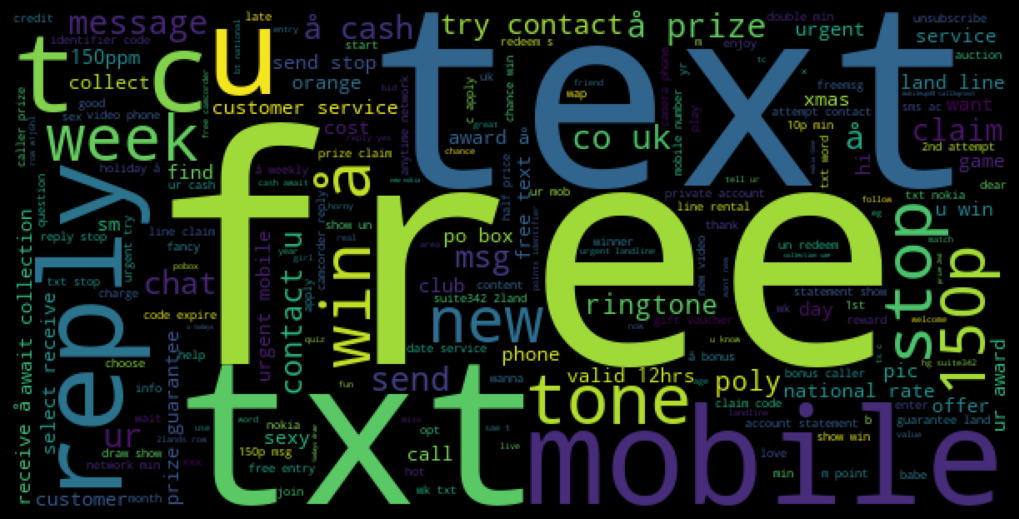

In [160]:
# on peut faire une image de wordcloud pour voir les mots les plus fréquents pour chaque type de label
from wordcloud import WordCloud
spam_words = ' '.join(df[df['label'] == 1]['processed_text'])
spam_wordcloud = WordCloud(width=600, height=300).generate(spam_words)
plt.figure(figsize=(10, 8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

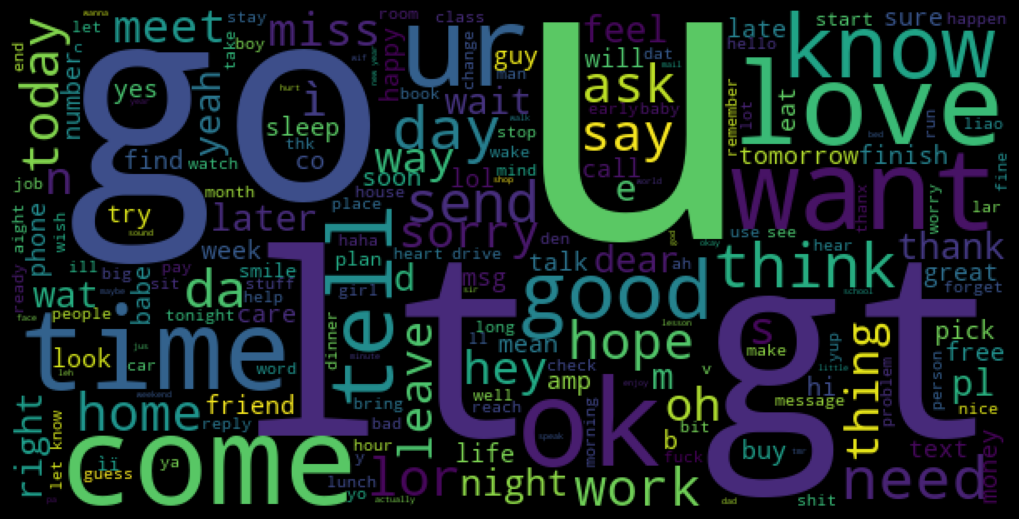

In [161]:
ham_words = ' '.join(df[df['label'] == 0]['processed_text'])
ham_wordcloud = WordCloud(width=600, height=300).generate(ham_words)
plt.figure(figsize=(10, 8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

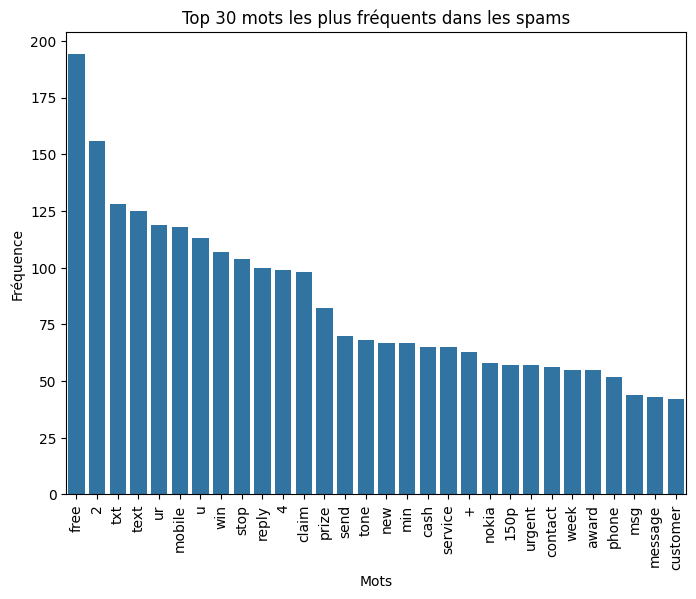

In [162]:
spam_messages = df[df['label'] == 1]['processed_text']
spam_words = []
for message in spam_messages:
    spam_words.extend(message.split())

# Calculer la fréquence des mots
spam_word_freq = Counter(spam_words)

# Convertir en DataFrame pour les 30 mots les plus fréquents
top_30_spam_words = pd.DataFrame(spam_word_freq.most_common(30), columns=['word', 'frequency'])

# Créer le barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='word', y='frequency', data=top_30_spam_words)
plt.xticks(rotation=90)  # Faire pivoter les étiquettes de mots pour les rendre lisibles
plt.title('Top 30 mots les plus fréquents dans les spams')
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.show()

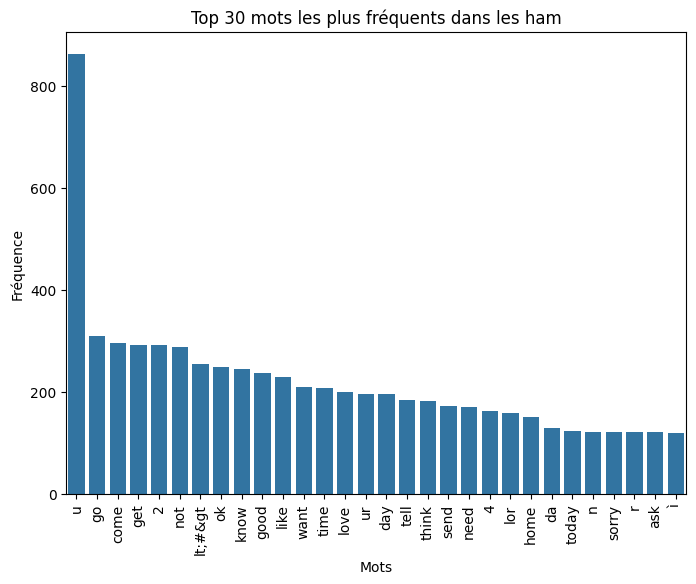

In [163]:
ham_messages = df[df['label'] == 0]['processed_text']
ham_words = []
for message in ham_messages:
    ham_words.extend(message.split())
    
# Calculer la fréquence des mots
ham_word_freq = Counter(ham_words)

# Convertir en DataFrame pour les 30 mots les plus fréquents
top_30_ham_words = pd.DataFrame(ham_word_freq.most_common(30), columns=['word', 'frequency'])

# Créer le barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='word', y='frequency', data=top_30_ham_words)
plt.xticks(rotation=90)  # Faire pivoter les étiquettes de mots pour les rendre lisibles
plt.title('Top 30 mots les plus fréquents dans les ham')
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.show()


on vient à la fin de notre data preprocessing et  on va commencer par le modèle. ce qu'on peut faire aussi dans la feature engineering de la mutualinfo regression(pca ect ..).

# Model building

In [164]:
#text vectorization
#pour comparer entre count vectorizer et tfidf vectorizer dans la cellule ci dessous tu peux commenter l'un des deux lignes
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
vectorizer=TfidfVectorizer(max_features=3000)


In [165]:
#X=cv.fit_transform(df['processed_text']).toarray()
X=vectorizer.fit_transform(df['processed_text']).toarray()

In [166]:
# ajouter nouvelle feature
#X = np.hstack((X,df['length'].values.reshape(-1,1)))


In [167]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [168]:
X.shape

(5169, 3000)

In [169]:
y=df['label'].values

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [171]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [207]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

GNB

In [208]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("accyracy_score => ",accuracy_score(y_test,y_pred1))
print("confusion amtrix =>",confusion_matrix(y_test,y_pred1))
print("precision score =>",precision_score(y_test,y_pred1))

accyracy_score =>  0.8568665377176016
confusion amtrix => [[758 131]
 [ 17 128]]
precision score => 0.4942084942084942


GNB works for numeric continuous values, so the result was exepcted, MNB i think will give better results

In [209]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("accyracy_score => ",accuracy_score(y_test,y_pred2))
print("confusion amtrix =>",confusion_matrix(y_test,y_pred2))
print("precision score =>",precision_score(y_test,y_pred2))

accyracy_score =>  0.9825918762088974
confusion amtrix => [[886   3]
 [ 15 130]]
precision score => 0.9774436090225563


Ce modèle est adapté pour les données où chaque caractéristique représente une fréquence ou un compte d'événement

In [210]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("accyracy_score => ",accuracy_score(y_test,y_pred3))
print("confusion amtrix =>",confusion_matrix(y_test,y_pred3))
print("precision score =>",precision_score(y_test,y_pred3))


accyracy_score =>  0.9777562862669246
confusion amtrix => [[886   3]
 [ 20 125]]
precision score => 0.9765625


BernoulliNB fonctionne bien avec la classification binaire car il est conçu pour des données binaires (0 ou 1). Ce modèle est particulièrement adapté lorsque les caractéristiques sont des indicateurs binaires, ce qui est souvent le cas dans les problèmes de classification de texte.

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [177]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
#bc = BaggingClassifier(n_estimators=50, random_state=2)
#etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [178]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'GBDT':gbdt,
    'xgb':xgb
}

In [179]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [180]:
train_classifier(clfs['SVC'],X_train,y_train,X_test,y_test)

(0.9777562862669246, np.float64(0.9621212121212122))

In [181]:
accuracy_scores = []
precision_scores = []

for clf_name in clfs.keys():
    accuracy,precision = train_classifier(clfs[clf_name],X_train,y_train,X_test,y_test)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    print(f"{clf_name} accuracy => {accuracy} and precision => {precision}")

SVC accuracy => 0.9777562862669246 and precision => 0.9621212121212122
KN accuracy => 0.8965183752417795 and precision => 1.0
NB accuracy => 0.9825918762088974 and precision => 0.9774436090225563
DT accuracy => 0.9303675048355899 and precision => 0.9506172839506173
LR accuracy => 0.9690522243713733 and precision => 0.9747899159663865
RF accuracy => 0.9796905222437138 and precision => 0.9920634920634921


C:\Users\ayman\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost accuracy => 0.9758220502901354 and precision => 0.9411764705882353
GBDT accuracy => 0.9429400386847195 and precision => 0.9777777777777777
xgb accuracy => 0.9806576402321083 and precision => 0.9770992366412213


In [182]:
performance = pd.DataFrame({'Model':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [183]:
performance

,Model,Accuracy,Precision
0,SVC,0.977756,0.962121
1,KN,0.896518,1.000000
2,NB,0.982592,0.977444
3,DT,0.930368,0.950617
4,LR,0.969052,0.974790
5,RF,0.979691,0.992063
6,AdaBoost,0.975822,0.941176
7,GBDT,0.942940,0.977778
8,xgb,0.980658,0.977099


In [184]:
performance_df = pd.melt(performance, id_vars = "Model")
performance_df

,Model,variable,value
0,SVC,Accuracy,0.977756
1,KN,Accuracy,0.896518
2,NB,Accuracy,0.982592
3,DT,Accuracy,0.930368
4,LR,Accuracy,0.969052
5,RF,Accuracy,0.979691
6,AdaBoost,Accuracy,0.975822
7,GBDT,Accuracy,0.942940
8,xgb,Accuracy,0.980658
9,SVC,Precision,0.962121


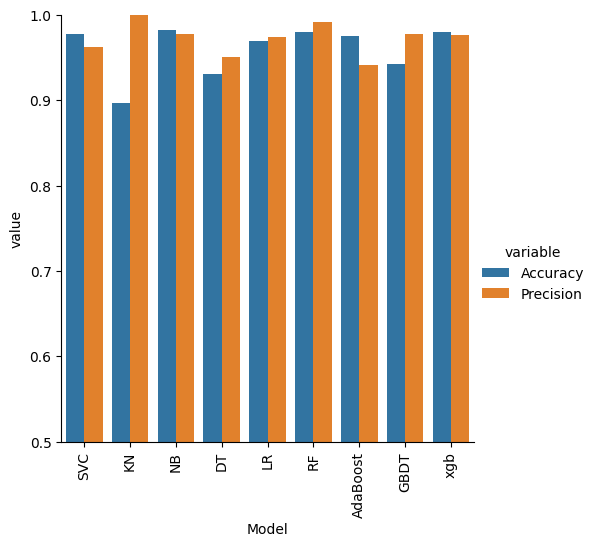

In [185]:
sns.catplot(x = 'Model', y='value', 
               hue = 'variable',data=performance_df, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [186]:
#improve model with changing the max_features parameter of Tf-Idf

In [187]:
temp_df = pd.DataFrame({'Model':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [188]:
temp_df = pd.DataFrame({'Model':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [189]:
new_df = performance_df.merge(temp_df,on='Model')


In [190]:
new_df

,Model,variable,value,Accuracy_scaling,Precision_scaling
0,SVC,Accuracy,0.977756,0.977756,0.962121
1,KN,Accuracy,0.896518,0.896518,1.000000
2,NB,Accuracy,0.982592,0.982592,0.977444
3,DT,Accuracy,0.930368,0.930368,0.950617
4,LR,Accuracy,0.969052,0.969052,0.974790
5,RF,Accuracy,0.979691,0.979691,0.992063
6,AdaBoost,Accuracy,0.975822,0.975822,0.941176
7,GBDT,Accuracy,0.942940,0.942940,0.977778
8,xgb,Accuracy,0.980658,0.980658,0.977099
9,SVC,Precision,0.962121,0.977756,0.962121


In [191]:
new_df_scaled = new_df.merge(temp_df,on='Model')


In [192]:
new_df_scaled

,Model,variable,value,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,SVC,Accuracy,0.977756,0.977756,0.962121,0.977756,0.962121
1,KN,Accuracy,0.896518,0.896518,1.000000,0.896518,1.000000
2,NB,Accuracy,0.982592,0.982592,0.977444,0.982592,0.977444
3,DT,Accuracy,0.930368,0.930368,0.950617,0.930368,0.950617
4,LR,Accuracy,0.969052,0.969052,0.974790,0.969052,0.974790
5,RF,Accuracy,0.979691,0.979691,0.992063,0.979691,0.992063
6,AdaBoost,Accuracy,0.975822,0.975822,0.941176,0.975822,0.941176
7,GBDT,Accuracy,0.942940,0.942940,0.977778,0.942940,0.977778
8,xgb,Accuracy,0.980658,0.980658,0.977099,0.980658,0.977099
9,SVC,Precision,0.962121,0.977756,0.962121,0.977756,0.962121


In [193]:
temp_df = pd.DataFrame({'Model':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [194]:
new_df_length=new_df_scaled.merge(temp_df,on='Model')


In [195]:
new_df_length

,Model,variable,value,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,Accuracy,0.977756,0.977756,0.962121,0.977756,0.962121,0.977756,0.962121
1,KN,Accuracy,0.896518,0.896518,1.000000,0.896518,1.000000,0.896518,1.000000
2,NB,Accuracy,0.982592,0.982592,0.977444,0.982592,0.977444,0.982592,0.977444
3,DT,Accuracy,0.930368,0.930368,0.950617,0.930368,0.950617,0.930368,0.950617
4,LR,Accuracy,0.969052,0.969052,0.974790,0.969052,0.974790,0.969052,0.974790
5,RF,Accuracy,0.979691,0.979691,0.992063,0.979691,0.992063,0.979691,0.992063
6,AdaBoost,Accuracy,0.975822,0.975822,0.941176,0.975822,0.941176,0.975822,0.941176
7,GBDT,Accuracy,0.942940,0.942940,0.977778,0.942940,0.977778,0.942940,0.977778
8,xgb,Accuracy,0.980658,0.980658,0.977099,0.980658,0.977099,0.980658,0.977099
9,SVC,Precision,0.962121,0.977756,0.962121,0.977756,0.962121,0.977756,0.962121


In [196]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [197]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [198]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [199]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9699248120300752


In [200]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [201]:
from sklearn.ensemble import StackingClassifier


In [202]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [203]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9864603481624759
Precision 0.9645390070921985


In [204]:
import pickle
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))
#load all models in a folder named pkl_models
for clf_name in clfs.keys():
    pickle.dump(clfs[clf_name],open(f'pkl_models/{clf_name}.pkl','wb'))




In [211]:
import pickle

pickle.dump(mnb,open('pkl_models/mnb.pkl','wb'))
pickle.dump(gnb,open('pkl_models/gnb.pkl','wb'))

In [206]:
#fait gaffe de bien commmenter certains codes pour exécuter d'autrs cellules, les résultats dans les cellules peuvent etre différents de ce qui est attendu car j'ai fait un run_all .